Завдання 1

In [6]:
import pandas as pd

# Завантаження даних
df = pd.read_csv('Groceries_dataset.csv')

# Перевірка наявності відсутніх значень
missing_values = df.isnull().sum()
print("Кількість відсутніх значень в кожному стовпці:")
print(missing_values)

# Обробка відсутніх значень (якщо потрібно)
# Наприклад, можна видалити рядки з відсутніми значеннями:
df.dropna(inplace=True)

# Перевірка формату стовпця дати та часу
# Перевіримо перші кілька значень у стовпці дати та часу, щоб побачити формат
print("Перші 5 значень у стовпці дати:")
print(df['Date'].head())

# Якщо формат не відповідає потрібному, можна змінити його
df['Date'] = pd.to_datetime(df['Date'])

# Перевірка, щоб побачити, чи змінився формат
print("Перші 5 значень після зміни формату:")
print(df['Date'].head())



Кількість відсутніх значень в кожному стовпці:
Member_number      0
Date               0
itemDescription    0
dtype: int64
Перші 5 значень у стовпці дати:
0    21-07-2015
1    05-01-2015
2    19-09-2015
3    12-12-2015
4    01-02-2015
Name: Date, dtype: object
Перші 5 значень після зміни формату:
0   2015-07-21
1   2015-05-01
2   2015-09-19
3   2015-12-12
4   2015-01-02
Name: Date, dtype: datetime64[ns]


<ipython-input-6-5a082bb468dd>:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Завдання 2

In [7]:
import pandas as pd

# Завантаження даних
df = pd.read_csv('Groceries_dataset.csv')

# Підсумкова статистика щодо кількості учасників
participants_summary = df['Member_number'].nunique()
print("Загальна кількість учасників:", participants_summary)

# Розподіл кількості учасників
participants_distribution = df['Member_number'].value_counts()
print("Розподіл кількості учасників:")
print(participants_distribution)

# Аналіз різноманітності предметів в описі
items_variety = df['itemDescription'].nunique()
print("Кількість унікальних предметів:", items_variety)

# Дослідження тенденцій з часом
# З перетворенням стовпця 'Date' на тип datetime, ми можемо використовувати його для аналізу тенденцій з часом.
df['Date'] = pd.to_datetime(df['Date'])

# Додаємо стовпець з днем тижня
df['Day_of_week'] = df['Date'].dt.day_name()

# Аналіз кількості покупок за день тижня
purchases_by_day = df.groupby('Day_of_week').size()
print("Кількість покупок за день тижня:")
print(purchases_by_day)


Загальна кількість учасників: 3898
Розподіл кількості учасників:
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64
Кількість унікальних предметів: 167
Кількість покупок за день тижня:
Day_of_week
Friday       5504
Monday       5299
Saturday     5397
Sunday       5624
Thursday     5754
Tuesday      5524
Wednesday    5663
dtype: int64


<ipython-input-7-ab3d78a5c9c6>:21: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Завдання 3

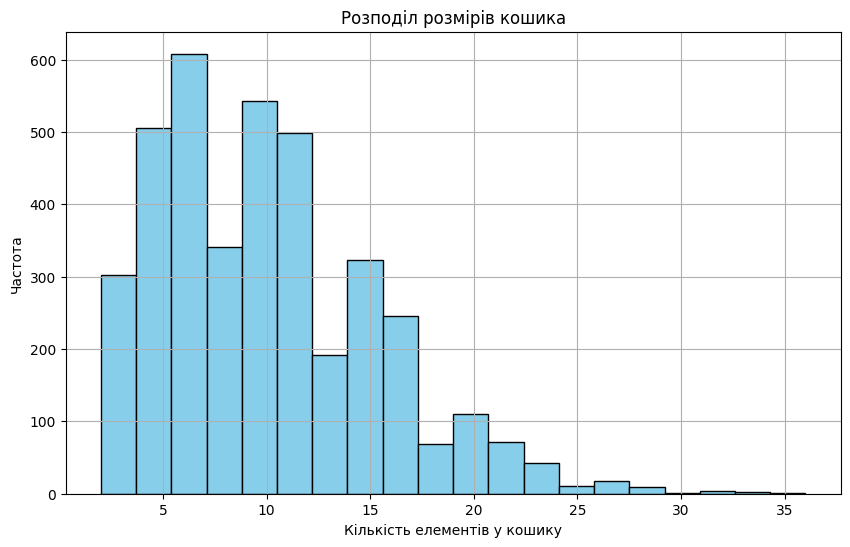

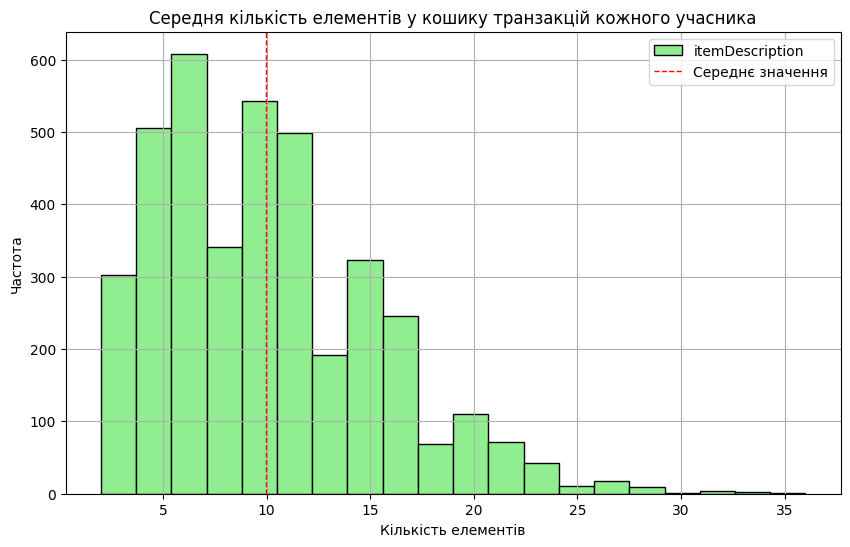

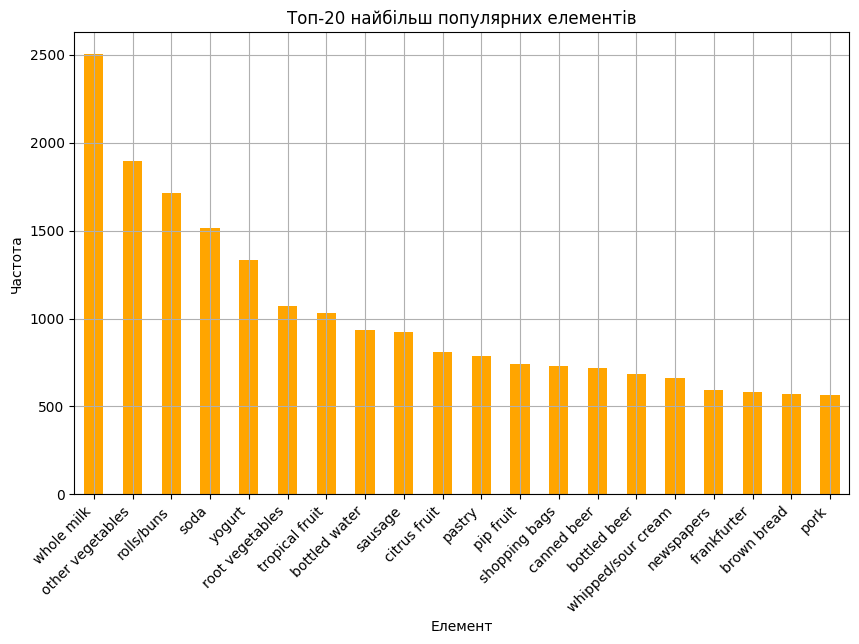

<ipython-input-21-71b46b2069ea>:41: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


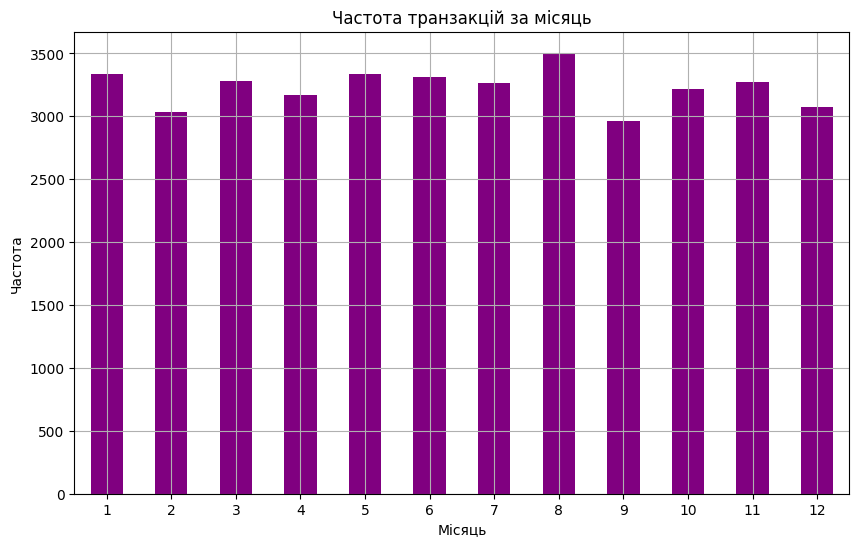

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('Groceries_dataset.csv')

# Гістограма розподілу розмірів кошика
plt.figure(figsize=(10, 6))
df['Member_number'].value_counts().plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл розмірів кошика')
plt.xlabel('Кількість елементів у кошику')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Середня кількість елементів у кошику транзакцій кожного учасника
mean_basket_size = df.groupby('Member_number')['itemDescription'].count().mean()

# Гістограма середньої кількості елементів у кошику транзакцій кожного учасника
plt.figure(figsize=(10, 6))
df.groupby('Member_number')['itemDescription'].count().plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.axvline(mean_basket_size, color='red', linestyle='dashed', linewidth=1, label='Середнє значення')
plt.title('Середня кількість елементів у кошику транзакцій кожного учасника')
plt.xlabel('Кількість елементів')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Гістограма частоти елементів
plt.figure(figsize=(10, 6))
df['itemDescription'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title('Топ-20 найбільш популярних елементів')
plt.xlabel('Елемент')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Графік частоти транзакцій з часом (наприклад, за місяць або рік)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
df['Month'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Частота транзакцій за місяць')
plt.xlabel('Місяць')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Завдання 4

In [22]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Завантаження даних
df = pd.read_csv('Groceries_dataset.csv')

# Перетворення даних у формат, який підтримує бібліотеку MLxtend
basket = (df.groupby(['Member_number', 'itemDescription'])['itemDescription']
          .count().unstack().reset_index().fillna(0)
          .set_index('Member_number'))

# Кодування даних для алгоритму Apriori (1 - товар куплений, 0 - товар не куплений)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Використання алгоритму Apriori для визначення частих наборів елементів
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Використання алгоритму association_rules для визначення правил асоціацій
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Фільтрація правил за певними критеріями, наприклад, за підвищенням чи підтримкою
filtered_rules = rules[(rules['lift'] >= 1) & (rules['support'] >= 0.01)]

print("Часті набори елементів:")
print(frequent_itemsets)
print("\nПравила асоціацій:")
print(filtered_rules)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Часті набори елементів:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (whole milk, yogurt, soda, whipped/sour cream)
3012  0.010518  (whole milk, rolls/buns, other vegetables, yog...
3013  0.013597  (whole milk, rolls/buns, sausage, other vegeta...
3014  0.010005  (whole milk, rolls/buns, other vegetables, yog...
3015  0.013597  (soda, whole milk, rolls/buns, other vegetable...

[3016 rows x 2 columns]

Правила асоціацій:
              antecedents                                        consequents  \
0              (UHT-milk)                                  

Завдання 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      antecedents      consequents  antecedent support  consequent support  \
0      (UHT-milk)           (beef)            0.078502            0.119548   
1          (beef)       (UHT-milk)            0.119548            0.078502   
2  (bottled beer)       (UHT-milk)            0.158799            0.078502   
3      (UHT-milk)   (bottled beer)            0.078502            0.158799   
4      (UHT-milk)  (bottled water)            0.078502            0.213699   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010518    0.133987  1.120775  0.001133    1.016672       0.116940  
1  0.010518    0.087983  1.120775  0.001133    1.010396       0.122392  
2  0.014879    0.093700  1.193597  0.002413    1.016769       0.192815  
3  0.014879    0.189542  1.193597  0.002413    1.037933       0.176014  
4  0.021293    0.271242  1.269268  0.004517    1.078960       0.230217  
Правило: {'UHT-milk'} => {'beef'}
Підтримка: 0.01051821446895844
Довіра: 0.13398692810457516


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


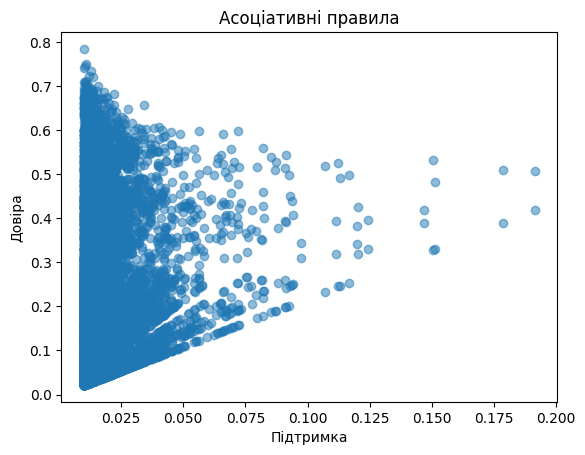

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Завантаження даних
df = pd.read_csv('Groceries_dataset.csv')

# Побудова розподілу елементів
basket = (df.groupby(['Member_number', 'itemDescription'])['itemDescription']
          .count().unstack().reset_index().fillna(0)
          .set_index('Member_number'))

# Кодування даних (1 - якщо товар куплений, 0 - якщо товар не куплений)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Застосування алгоритму Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Виявлення асоціативних правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Вивід перших декількох правил
print(rules.head())

# Інтерпретація правил
for index, row in rules.head().iterrows():
    antecedent = set(row['antecedents'])
    consequent = set(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    print(f"Правило: {antecedent} => {consequent}")
    print(f"Підтримка: {support}")
    print(f"Довіра: {confidence}")
    print(f"Підйом: {lift}")
    print("\n")

# Візуалізація правил
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Підтримка')
plt.ylabel('Довіра')
plt.title('Асоціативні правила')
plt.show()


Додаткове завдання

In [76]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Завантаження даних
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Перетворення даних у вигляд, який очікує алгоритм Apriori
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Використання алгоритму Apriori для знаходження часто зустрічаються наборів елементів
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Використання алгоритму виявлення асоціативних правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Відфільтруємо правила, які відповідають пропозиції "купуйте 1, отримайте 1 безкоштовно"
rules_1_1 = rules[rules['antecedents'].apply(lambda x: len(x) == 1)]
rules_1_1 = rules_1_1[rules_1_1['consequents'].apply(lambda x: len(x) == 1)]

# Відсортуємо правила за показником підтримки
top_10_1_1 = rules_1_1.sort_values(by='support', ascending=False).head(10)
print("Top 10 'Buy 1 Get 1 Free' rules:")
print(top_10_1_1)

# Тепер змінемо умову на "купуйте 2, отримайте 2 безкоштовно"

frequent_itemsets_2_2 = apriori(df, min_support=0.01, use_colnames=True)
rules_2_2 = association_rules(frequent_itemsets_2_2, metric="lift", min_threshold=1)

# Відфільтруємо правила, які відповідають пропозиції "купуйте 2, отримуйте 2 безкоштовно"
rules_2_2 = rules_2_2[rules_2_2['antecedents'].apply(lambda x: len(x) == 2)]
rules_2_2 = rules_2_2[rules_2_2['consequents'].apply(lambda x: len(x) == 2)]

# Відсортуємо правила за показником підтримки
top_10_2_2 = rules_2_2.sort_values(by='support', ascending=False).head(10)
print("\nTop 10 'Buy 2 Get 2 Free' rules:")
print(top_10_2_2)





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 'Buy 1 Get 1 Free' rules:
        antecedents     consequents  antecedent support  consequent support  \
162           (nan)          (eggs)            0.999867            0.179709   
163          (eggs)           (nan)            0.179709            0.999867   
385     (spaghetti)           (nan)            0.174110            0.999867   
384           (nan)     (spaghetti)            0.999867            0.174110   
198  (french fries)           (nan)            0.170911            0.999867   
199           (nan)  (french fries)            0.999867            0.170911   
108           (nan)     (chocolate)            0.999867            0.163845   
109     (chocolate)           (nan)            0.163845            0.999867   
320           (nan)          (milk)            0.999867            0.129583   
321          (milk)           (nan)            0.129583            0.999867   

      support  confidence      lift  leverage  conviction  zhangs_metric  
162  0.179709    0.179